# Torch.. install, JODIE dataset, LANL dataset

In [ ]:
# DATA test시에는 cpu이용
# Install PyTorch (CUDA 지원 버전)
!pip install torch==2.4.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

# Install PyG dependencies
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.4.0+cpu.html
!pip install torch-geometric


In [ ]:
# JODIE dataset
import torch
from torch_geometric.datasets import JODIEDataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# FIXED for Colab: the dataset path must NOT use __file__
root = '/content/data/JODIE'

dataset = JODIEDataset(root, name='wikipedia')
data = dataset[0]


In [ ]:
from google.colab import drive
drive.mount('/content/data')

!wget https://csr.lanl.gov/data-fence/1765218837/rZASWPn1alckYmv-hXc_zo79B88=/unified-host-network-dataset-2017/netflow/netflow_day-02.bz2

Mounted at /content/data
--2025-12-11 13:30:53--  https://csr.lanl.gov/data-fence/1765218837/rZASWPn1alckYmv-hXc_zo79B88=/unified-host-network-dataset-2017/netflow/netflow_day-02.bz2
Resolving csr.lanl.gov (csr.lanl.gov)... 204.121.60.93
Connecting to csr.lanl.gov (csr.lanl.gov)|204.121.60.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1077270484 (1.0G) [application/octet-stream]
Saving to: ‘netflow_day-02.bz2’

netflow_day-02.bz2  100%[===================>]   1.00G  1.67MB/s    in 10m 21s 

2025-12-11 13:41:15 (1.65 MB/s) - ‘netflow_day-02.bz2’ saved [1077270484/1077270484]



In [ ]:
import bz2
path = "/content/netflow_day-02.bz2"

with bz2.open(path,"rt") as f:
  for i, line in enumerate(f):
    cols = line.strip().split()

    if i%100000 == 0:
      print("Read", i, "lines")
      print(line)

Read 0 lines
118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018

Read 100000 lines
120440,3596412,Comp268371,Comp536273,17,Port41101,Port41101,309370,0,299001295,0

Read 200000 lines
120506,1858570,Comp747553,Comp536273,17,Port41101,Port41101,171232,0,186068909,0

Read 300000 lines
120576,523266,Comp097593,EnterpriseAppServer,17,Port63263,Port89303,1744,0,2616000,0

Read 400000 lines
120633,2572536,Comp240658,Comp469322,1,Port15379,Port15379,24981,0,4940176,0

Read 500000 lines
120663,24390,IP004104,Comp141988,17,5060,5060,828,0,682218,0

Read 600000 lines
120732,46262,Comp119154,Comp370444,6,Port79215,Port56580,51,52,12903,2392

Read 700000 lines
120844,577817,Comp596747,Comp387111,17,123,123,3686,0,280136,0

Read 800000 lines
120899,1725953,Comp111330,Comp364152,6,Port09128,445,23465,23281,1149817,1126239

Read 900000 lines
120959,43922,Comp519547,Comp364152,6,Port10716,445,389,380,21900,21631

Read 1000000 lines
120981,99671,Comp185484,Comp275646,17,123,1

KeyboardInterrupt: 

# CIC-IDS-2017 data load code
In cell order,

(1) : mount drive

(2) : example code of reading 1 csv file

(3) : example code of reading every csv file

(4) : analyzing every csv file's label data -> not working

**you can go to random forest code just after you excute cell 1**

In [1]:
# CELL 1
#CIC-IDS-2017
from google.colab import drive

mount_path = "/content/data"
dir_path = mount_path + "/MyDrive/Project_Folder/TGN-NeuroSym/DATASETS/CIC-IDS-2017/GeneratedLabelledFlows/TrafficLabelling/"

drive.mount(mount_path)

Mounted at /content/data


In [34]:
# CELL 2
import pandas as pd
import torch


path = mount_path + "/MyDrive/Project_Folder/TGN-NeuroSym/DATASETS/CIC-IDS-2017/GeneratedLabelledFlows/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
path_wen = mount_path + "/MyDrive/Project_Folder/TGN-NeuroSym/DATASETS/CIC-IDS-2017/GeneratedLabelledFlows/TrafficLabelling/Wednesday-workingHours.pcap_ISCX.csv"
path_mon =  mount_path + "/MyDrive/Project_Folder/TGN-NeuroSym/DATASETS/CIC-IDS-2017/GeneratedLabelledFlows/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv"
df = pd.read_csv(path_mon)


OSError: [Errno 107] Transport endpoint is not connected: '/content/data/MyDrive/Project_Folder/TGN-NeuroSym/DATASETS/CIC-IDS-2017/GeneratedLabelledFlows/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv'

In [2]:
# CELL 3
import os
import pandas as pd
import torch

df = dict()

for filename in os.listdir(dir_path):
    file_path = os.path.join(dir_path, filename)
    if os.path.isfile(file_path):
        print(filename)
        d = pd.read_csv(file_path, skiprows=(1,100),nrows=100)
        df[filename] = d


Wednesday-workingHours.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv


In [3]:
# CELL 4
for filename, dataframe in df.items():
    s = set(dataframe[dataframe.columns[-1]])
    print(filename, ' : ', s)

Wednesday-workingHours.pcap_ISCX.csv  :  {'BENIGN'}
Tuesday-WorkingHours.pcap_ISCX.csv  :  {'BENIGN'}
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  :  {'BENIGN'}
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  :  {'BENIGN'}
Friday-WorkingHours-Morning.pcap_ISCX.csv  :  {'BENIGN'}
Monday-WorkingHours.pcap_ISCX.csv  :  {'BENIGN'}
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  :  {'BENIGN'}
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  :  {'BENIGN'}


# Random Forest code

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 파일 경로 설정 (사용하시는 파일명으로 꼭 수정해주세요!)
file_path = dir_path + 'Wednesday-workingHours.pcap_ISCX.csv'

print("✅ 라이브러리 임포트 및 설정 완료")

✅ 라이브러리 임포트 및 설정 완료


In [97]:
print("📂 데이터를 로드하는 중입니다... (1~2분 정도 소요될 수 있습니다)")
df = pd.read_csv(file_path)

# 1. 컬럼명 앞뒤 공백 제거 (매우 중요!)
df.columns = df.columns.str.strip()

# 2. 무한대(Infinity) 값 및 결측치(NaN) 제거
# Flow Bytes/s 등에서 0으로 나누는 경우 발생 가능한 무한대 값을 제거합니다.
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

print(f"✅ 데이터 로드 및 정제 완료!")
print(f"   - 최종 데이터 크기(Shape): {df.shape}")
print(f"   - 컬럼 목록 예시: {df.columns[:5].tolist()}")

📂 데이터를 로드하는 중입니다... (1~2분 정도 소요될 수 있습니다)
✅ 데이터 로드 및 정제 완료!
   - 최종 데이터 크기(Shape): (691406, 85)
   - 컬럼 목록 예시: ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port']


In [98]:
# 1. 속도를 위해 10%만 샘플링 (Feature Importance 뽑는 데는 충분합니다)
df_sample = df.sample(frac=0.1, random_state=42)

# 2. 제거할 컬럼 목록 (식별자 및 정답지)
# TGN의 'Edge Feature'로 넣기 부적절한 식별 정보들은 뺍니다.
drop_cols = ['Source IP', 'Source Port', 'Destination IP', 'Destination Port',
             'Protocol', 'Timestamp', 'Label', 'Flow ID']

# 실제 데이터에 존재하는 컬럼만 골라서 제거 (에러 방지)
existing_drop_cols = [c for c in drop_cols if c in df_sample.columns]

# X: 순수 통계 정보
X = df_sample.drop(columns=existing_drop_cols)

# y: 공격 여부 (BENIGN은 0, 공격은 1)
y = np.where(df_sample['Label'] == 'BENIGN', 0, 1)

print(f"✅ 학습 데이터 준비 완료")
print(f"   - 학습에 사용할 샘플 수: {len(X)}")
print(f"   - 피처(X) 개수: {X.shape[1]}개")

✅ 학습 데이터 준비 완료
   - 학습에 사용할 샘플 수: 69141
   - 피처(X) 개수: 77개


In [99]:
print("🌲 랜덤 포레스트 학습 시작...")

# 모델 생성 (나무 100그루)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 학습 (Fit)
rf.fit(X, y)

print("✅ 학습 완료!")

🌲 랜덤 포레스트 학습 시작...
✅ 학습 완료!



🔥 [Top 20 핵심 피처 목록] 🔥
                        Feature  Importance
12        Bwd Packet Length Std    0.100044
39           Packet Length Mean    0.076267
36                Bwd Packets/s    0.050642
51          Average Packet Size    0.049850
9         Bwd Packet Length Max    0.049579
64            Subflow Bwd Bytes    0.048245
11       Bwd Packet Length Mean    0.047933
65       Init_Win_bytes_forward    0.043873
38            Max Packet Length    0.041054
53         Avg Bwd Segment Size    0.033328
41       Packet Length Variance    0.032912
40            Packet Length Std    0.026445
2        Total Backward Packets    0.023532
34            Bwd Header Length    0.021338
13                 Flow Bytes/s    0.021071
52         Avg Fwd Segment Size    0.020113
4   Total Length of Bwd Packets    0.019785
66      Init_Win_bytes_backward    0.017427
7        Fwd Packet Length Mean    0.015453
75                     Idle Max    0.014481


/tmp/ipython-input-3426864958.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(20), palette='viridis')


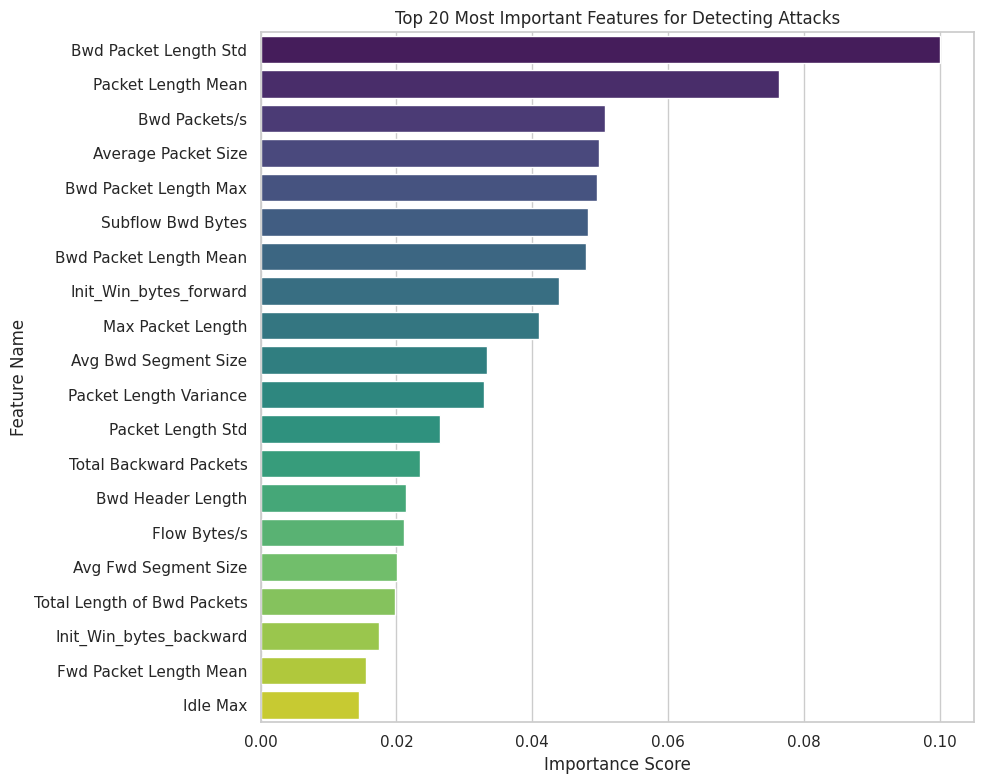

In [100]:
# 중요도 추출
importances = rf.feature_importances_
feature_names = X.columns

# 데이터프레임으로 변환 및 정렬
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# ---------------- 결과 출력 ----------------
print("\n🔥 [Top 20 핵심 피처 목록] 🔥")
print(feature_imp_df.head(20))

# ---------------- 시각화 ----------------
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(20), palette='viridis')
plt.title('Top 20 Most Important Features for Detecting Attacks')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# Based on RF, make the learnable CIC-IDS-2017 data

In [101]:
# key feature 8개 + msg featrue 20개 만 남기고 나머지 모두 제거
choosed_feature = list(feature_imp_df.head(20)['Feature'])
key_cols = ['Source IP', 'Source Port', 'Destination IP', 'Destination Port',
             'Protocol', 'Timestamp', 'Label', 'Flow ID']
drop_cols = list(set(df.columns) - set(choosed_feature + key_cols))
df = df.drop(columns=drop_cols)

# Flow ID도 필요가 없음
df = df.drop(columns="Flow ID")
preprocessed_df = None

## 1. src, dst, time 전처리

In [102]:
# (src, dst, time, msg) 형태로 변환
# (src, dst, time ,msg) = (Source IP, Destination IP, Timestampe, rest of the dataframe)

#src,dst 전처리 src,dst IP -> node num
# ==========================================
# lobal Node Map 생성 (Source + Destination 통합)
# ==========================================
# 보내는 사람(Src)과 받는 사람(Dst)을 합쳐서 전체 네트워크의 '등장인물(Node)' 목록을 만듭니다.
src_ips = df['Source IP'].unique()
dst_ips = df['Destination IP'].unique()

# 합치고, 중복 제거하고, 정렬(Sorting) -> 정렬해야 매번 실행할 때마다 ID가 같게 유지됩니다.
all_ips = np.unique(np.concatenate((src_ips, dst_ips)))

print(f"총 고유 IP(노드) 개수: {len(all_ips)}")

# IP -> ID (Integer) 딕셔너리 생성
ip_to_idx = {ip: i for i, ip in enumerate(all_ips)}

# ID -> IP (나중에 결과 해석할 때 사용)
idx_to_ip = {i: ip for ip, i in ip_to_idx.items()}

총 고유 IP(노드) 개수: 9015


In [103]:
# ==========================================
# DataFrame에 매핑 적용
# ==========================================
# map 함수를 쓰면 매우 빠릅니다.
df['src_idx'] = df['Source IP'].map(ip_to_idx)
df['dst_idx'] = df['Destination IP'].map(ip_to_idx)

# 결과 확인
print("\n[매핑 완료된 데이터프레임]")
print(df[['Source IP', 'src_idx', 'Destination IP', 'dst_idx']].head())


[매핑 완료된 데이터프레임]
       Source IP  src_idx Destination IP  dst_idx
0  192.168.10.14     2602  209.48.71.168     3346
1  192.168.10.17     2605   192.168.10.3     2609
2  192.168.10.17     2605   192.168.10.3     2609
3  192.168.10.17     2605   192.168.10.3     2609
4  192.168.10.17     2605   192.168.10.3     2609


In [104]:
# time 전처리
# -------------------------------------------------------------------------
# [Step 1] 문자열 -> Datetime 객체로 변환
# -------------------------------------------------------------------------
# format='%d/%m/%Y %H:%M' 설명:
# 주의: 만약 데이터에 '오전/오후'가 있거나 '초'가 포함된 행이 섞여 있다면 format을 지우고 실행하세요.
df['dt'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H:%M')

# -------------------------------------------------------------------------
# [Step 2] Datetime -> Unix Timestamp (초 단위 정수) 변환
# -------------------------------------------------------------------------
# 판다스 내부적으로 나노초(ns) 단위 정수로 저장되므로 10의 9승으로 나누어 줍니다.
df['unix_ts'] = df['dt'].astype('int64') // 10**9

# -------------------------------------------------------------------------
# [Step 3] (TGN 추천) 첫 데이터를 0초로 맞춘 '상대 시간' 생성
# -------------------------------------------------------------------------
# 모델이 학습할 때 숫자가 작을수록 더 잘 학습합니다.
start_time = df['unix_ts'].min()
df['ts_norm'] = df['unix_ts'] - start_time

print(df[['Timestamp', 'dt', 'unix_ts', 'ts_norm']].head())

       Timestamp                  dt     unix_ts  ts_norm
0  5/7/2017 8:42 2017-07-05 08:42:00  1499244120    27720
1  5/7/2017 8:42 2017-07-05 08:42:00  1499244120    27720
2  5/7/2017 8:42 2017-07-05 08:42:00  1499244120    27720
3  5/7/2017 8:42 2017-07-05 08:42:00  1499244120    27720
4  5/7/2017 8:42 2017-07-05 08:42:00  1499244120    27720


## 2. Msg 전처리, 여기선 df 실제값을 건듬

In [106]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

selected_features = ['Source Port', 'Destination Port',
       'Protocol', 'Total Backward Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Mean',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Bwd Header Length',
       'Bwd Packets/s', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Bwd Bytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'Idle Max',
       ]
print("Msg로 사용될 columns 수 : ",len(selected_features)) # 23 = 20 feature + 1 protocol + 2 src, dst port

# 1. 로그 변환이 필요한 컬럼 (값이 매우 크거나 치우친 분포)
log_cols = [
    'Flow Bytes/s', 'Bwd Packets/s',
    'Total Length of Bwd Packets', 'Subflow Bwd Bytes',
    'Packet Length Variance',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward'
]

# Init_Win_bytes는 TCP연결시 상대방에게 보내는 내 수신버퍼의 여유 크기를 의미
# forward는 src가 dst에게 보낸 내용, backward는 반대.
# -1이면 UDP연결을 의미하고 이는 log(1+x)에 넣을 수 없으므로 0으로 처리
df['Init_Win_bytes_forward'] = df['Init_Win_bytes_forward'].replace(-1, 0)
df['Init_Win_bytes_backward'] = df['Init_Win_bytes_backward'].replace(-1, 0)

# np.log1p는 log(x+1)을 계산해줍니다 (0인 경우 -inf가 나오는 것을 방지)
# 에러 방지를 위해 미리 float 변환 후 적용
for col in log_cols:
    if col in df.columns:
        df[col] = np.log1p(df[col].astype(float))

print("1. 로그 변환 완료")

# 2. 포트 번호 정규화 (0~65535 -> 0~1)
port_cols = ['Source Port', 'Destination Port']
for col in port_cols:
    if col in df.columns:
        df[col] = df[col].astype(float) / 65535.0

print("2. 포트 정규화 완료")


Msg로 사용될 columns 수 :  23
1. 로그 변환 완료
2. 포트 정규화 완료


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


# 모든 컬럼 표준화 (src, dst, t, msg)

In [107]:
# 3. 나머지 모든 컬럼 표준화 (Standard Scaling)
# 위에서 처리한 로그 변환된 값들도 스케일이 제각각이므로,
# 마지막에 전체적으로 한번 싹 표준화 해주는 게 베스트입니다.

# StandardScaler 적용 (평균 0, 분산 1로 통일)
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

print("3. 전체 표준화 완료 (이제 Tensor로 바꿔도 안전합니다)")

# 결과 확인
print(df[selected_features].describe())

3. 전체 표준화 완료 (이제 Tensor로 바꿔도 안전합니다)
        Source Port  Destination Port      Protocol  Total Backward Packets  \
count  6.914060e+05      6.914060e+05  6.914060e+05            6.914060e+05   
mean  -9.076452e-17     -5.195940e-17 -1.012879e-16            1.582624e-18   
std    1.000001e+00      1.000001e+00  1.000001e+00            1.000001e+00   
min   -2.179777e+00     -3.614681e-01 -1.840494e+00           -1.038745e-02   
25%   -3.251138e-01     -3.580971e-01 -6.434955e-01           -9.372357e-03   
50%    3.705643e-01     -3.563798e-01 -6.434955e-01           -8.357259e-03   
75%    7.323762e-01     -3.332916e-01  1.551001e+00           -4.296867e-03   
max    1.174494e+00      3.803755e+00  1.551001e+00            2.764546e+02   

       Total Length of Bwd Packets  Fwd Packet Length Mean  \
count                 6.914060e+05            6.914060e+05   
mean                 -3.344475e-16            2.272402e-16   
std                   1.000001e+00            1.000001e+00   
min 

# Dataframe to Tensor

In [115]:
import torch

preprocessed_df = pd.DataFrame(df[['src_idx','dst_idx','ts_norm'] + selected_features])
#print(preprocessed_df.head(3))

tensor = torch.tensor(preprocessed_df.values, dtype=torch.float32)
tensor.shape

torch.Size([691406, 26])